# Setup & Utility Functions

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
import time
import numpy as np

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes=['Class 0', 'Class 1'], title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


def plot_roc_curve(y_true_binary, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Downloading the Data

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir -p {HOME}/data

In [ ]:
!wget https://archive.ics.uci.edu/static/public/475/audit+data.zip
!unzip {HOME}/audit+data.zip -d {HOME}/data/

--2024-04-21 06:10:47--  https://archive.ics.uci.edu/static/public/475/audit+data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘audit+data.zip’

audit+data.zip          [ <=>                ]  27.78K  --.-KB/s    in 0.07s   

2024-04-21 06:10:47 (424 KB/s) - ‘audit+data.zip’ saved [28447]

Archive:  /content/audit+data.zip
  inflating: /content/data/audit_data/audit_risk.csv  
  inflating: /content/data/audit_data/trial.csv  


In [ ]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip {HOME}/bike+sharing+dataset.zip -d {HOME}/data/bike_sharing_data

--2024-04-21 06:10:47--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip’

bike+sharing+datase     [  <=>               ] 273.43K  1.02MB/s    in 0.3s    

2024-04-21 06:10:48 (1.02 MB/s) - ‘bike+sharing+dataset.zip’ saved [279992]

Archive:  /content/bike+sharing+dataset.zip
  inflating: /content/data/bike_sharing_data/Readme.txt  
  inflating: /content/data/bike_sharing_data/day.csv  
  inflating: /content/data/bike_sharing_data/hour.csv  


# Analysing The Data

## Audit Risk Dataset

In [ ]:
import pandas as pd

audit_risk_data = pd.read_csv(f"{HOME}/data/audit_data/trial.csv")
audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [ ]:
audit_risk_data.shape

(776, 18)

In [ ]:
# Check if there is a null value
audit_risk_data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
# Fill the null value with mean of the column 'Money_Value
audit_risk_data['Money_Value'] = audit_risk_data['Money_Value'].fillna(audit_risk_data.Money_Value.mean())

In [ ]:
audit_risk_data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
# Check the data type
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    776 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
# Convert the LOCATION_ID column
counts = audit_risk_data['LOCATION_ID'].value_counts()
print(counts)

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64


In [ ]:
# Convert LOCATION_ID column to numeric, coerce non-numeric values to NaN
audit_risk_data["LOCATION_ID"] = pd.to_numeric(audit_risk_data["LOCATION_ID"], errors='coerce')

# Replace NaN values with the mean of the LOCATION_ID column
mean_location_id = audit_risk_data["LOCATION_ID"].mean()
audit_risk_data["LOCATION_ID"].fillna(mean_location_id, inplace=True)

In [ ]:
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    float64
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    776 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
audit_risk_data.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.856404,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.872154,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.563533,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.095000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.630000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


## Bike Sharing Dataset

In [ ]:
day_data = pd.read_csv(f"{HOME}/data/bike_sharing_data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_data.shape

(731, 16)

In [ ]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Drop unnecessary columns
day_data = day_data.drop(columns=['instant', 'dteday'])

In [ ]:
audit_risk_data.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.856404,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.872154,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.563533,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.095000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.630000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


# Preprocessing the Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re

def apply_normalization(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return pd.DataFrame(X_scaled, columns=X.columns)

def load_data(file_path, target, preprocessing_function=None, split=False, normalize=False):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Preprocess the dataset
    if preprocessing_function:
        df = preprocessing_function(df)

    # Split features and target variable
    X = df.drop(columns=[target])
    y = df[target]

    # First split the data, then normalize it!
    if split:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if normalize:
            X_train = apply_normalization(X_train)
            X_test = apply_normalization(X_test)
        return X_train, X_test, y_train, y_test
    else:
        if normalize:
            X = normalize(X)
        return X, y


def preprocess_bike_sharing(df):
    # Drop unnecessary columns
    df = df.drop(columns=['instant', 'dteday'])

    return df


def preprocess_audit_risk(df):
    # Fill the null value with mean of the column 'Money_Value
    df['Money_Value'] = df['Money_Value'].fillna(df.Money_Value.mean())

    # Convert LOCATION_ID column to numeric, coerce non-numeric values to NaN
    df["LOCATION_ID"] = pd.to_numeric(df["LOCATION_ID"], errors='coerce')

    # Replace NaN values with the mean of the LOCATION_ID column
    mean_location_id = df["LOCATION_ID"].mean()
    df["LOCATION_ID"].fillna(mean_location_id, inplace=True)

    return df

In [ ]:
DS_AUDIT_RISK_PATH = f"{HOME}/data/audit_data/trial.csv"
DS_BIKE_SHARING_PATH = f"{HOME}/data/bike_sharing_data/day.csv"

def load_data_audit_risk(split=True, normalize=True):
    return load_data(
        file_path=DS_AUDIT_RISK_PATH,
        target='Risk',
        preprocessing_function=preprocess_audit_risk,
        split=split,
        normalize=normalize)

def load_data_bike_sharing(split=True, normalize=True):
    return load_data(
        file_path=DS_BIKE_SHARING_PATH,
        target='cnt',
        preprocessing_function=preprocess_bike_sharing,
        split=split,
        normalize=normalize)

# Part 1: Build a classifier based on KNN (K=3 for testing) using Euclidean distance

In [ ]:
import numpy as np
from collections import Counter
from enum import Enum

class DistanceMetric(Enum):
    Euclidean = 1
    Manhattan = 2

class ProblemType(Enum):
    Regression = 1
    Classification = 2

class KNN:
    def __init__(self, problem_type, k=3, distance_metric=DistanceMetric.Euclidean):
        self.k = k
        self.problem_type = problem_type
        self.predict_method = self.classification_predict if problem_type == ProblemType.Classification else self.regression_predict
        self.distance_metric = distance_metric
        self.distance_method = self.euclidean_distance if distance_metric == DistanceMetric.Euclidean else self.manhattan_distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = [self.distance_method(X_test[i], x) for x in self.X_train]
            k_indices = sorted(range(len(distances)), key=lambda x: distances[x])[:self.k]
            k_nearest_labels = [self.y_train[j] for j in k_indices]
            predictions.append(self.predict_method(k_nearest_labels))

        return predictions

    def classification_predict(self, k_nearest_labels):
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def regression_predict(self, k_nearest_labels):
        return sum(k_nearest_labels) / len(k_nearest_labels)

    def euclidean_distance(self, x1: list, x2: list):
        distance = 0.0
        for i in range(len(x1)):
            distance += (x1[i] - x2[i])**2
        return np.sqrt(distance)

    def manhattan_distance(self, x1: list, x2: list):
        distance = 0.0
        for i in range(len(x1)):
            distance += np.abs(x1[i] - x2[i])**2
        return distance

Accuracy for fold: 0.99
Accuracy for fold: 0.99
Accuracy for fold: 1.00
Accuracy for fold: 0.99
Accuracy for fold: 1.00
Accuracy for fold: 0.99
Overall Accuracy from k-fold Cross-Validation: 0.99 



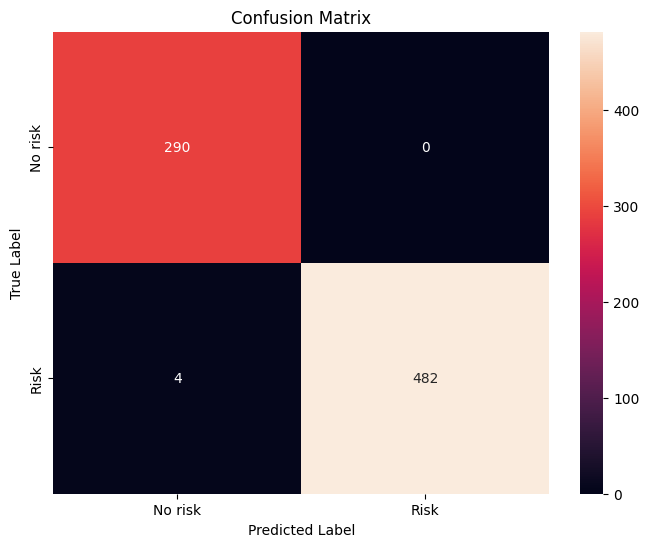


Total Runtime: 22.06 seconds


In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X, y = load_data_audit_risk(split=False, normalize=False)

# Perform k-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store predictions and true labels
all_y_pred = []
all_y_true = []

start_time = time.time()

for train_index, val_index  in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply normalization after splitting the dataset!
    X_train_fold = apply_normalization(X_train_fold)
    X_val_fold = apply_normalization(X_val_fold)

    # Train the model
    knn_classifier = KNN(k=3, problem_type=ProblemType.Classification, distance_metric=DistanceMetric.Euclidean)
    knn_classifier.fit(X_train_fold.values, y_train_fold.values)

    # Make predictions
    y_pred = knn_classifier.predict(X_val_fold.values)

    # Collect predictions and true labels
    all_y_pred.extend(y_pred)
    all_y_true.extend(y_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)
    print(f"Accuracy for fold: {accuracy:.2f}")

end_time = time.time()

# Compute overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"Overall Accuracy from k-fold Cross-Validation: {overall_accuracy:.2f}", "\n")

# Plot confusion matrix
plot_confusion_matrix(all_y_true, all_y_pred, classes=['No risk', 'Risk'])

# Calculate and print runtime
runtime = end_time - start_time
print(f"\nTotal Runtime: {runtime:.2f} seconds")

# Part 2: Build a regressor based on KNN (K=3 for testing) using Manhattan distance

In [ ]:
from sklearn.metrics import mean_squared_error

X, y = load_data_bike_sharing(split=False, normalize=False)

# Perform k-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

mse = []

start_time = time.time()

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply normalization after splitting the dataset!
    X_train_fold = apply_normalization(X_train_fold)
    X_val_fold = apply_normalization(X_val_fold)

    # Train the model
    knn_regressor = KNN(k=3, problem_type=ProblemType.Regression, distance_metric=DistanceMetric.Manhattan)
    knn_regressor.fit(X_train_fold.values, y_train_fold.values)

    # Make predictions
    y_pred_fold = knn_regressor.predict(X_val_fold.values)

    # Compute MSE
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mse.append(mse_fold)

    print(f"MSE for fold: {mse_fold:.2f}")

end_time = time.time()

# Average MSE across all folds on training set
avg_mse = sum(mse) / len(mse)
print(f"Average MSE from k-fold Cross-Validation: {avg_mse:.2f}")

# Calculate and print runtime
runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} seconds")

MSE for fold: 373972.28
MSE for fold: 263697.68
MSE for fold: 307152.76
MSE for fold: 297322.59
MSE for fold: 359299.07
MSE for fold: 279818.16
Average MSE from k-fold Cross-Validation: 313543.76
Total Runtime: 18.65 seconds


# Part 3: Build a classifier based on the linear SVM

Efficient generation of ROC curves, proposed by Tom Fawcett

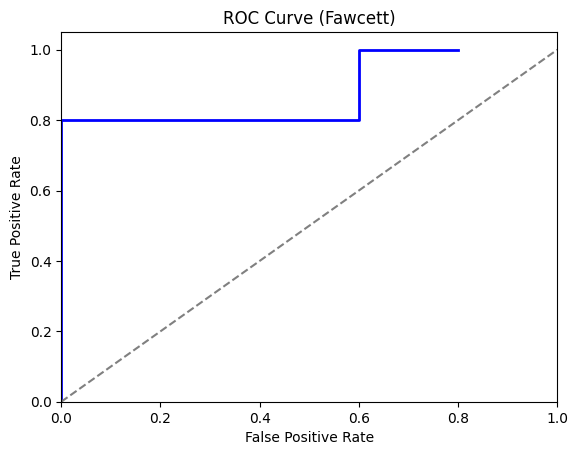

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_roc_curve(y_true, y_probs):
    # Sort the probabilities and true labels by descending probability
    sorted_indices = np.argsort(y_probs)[::-1]
    # Calculate total number of positive and negative samples
    num_positives = np.sum(y_true)
    num_negatives = len(y_true) - num_positives

    # Initialize variables for counting true positives (TP) and false positives (FP)
    tp_count = 0
    fp_count = 0
    prev_threshold = 0.0
    fprs = []
    tprs = []

    # Iterate through each probability threshold
    for i in sorted_indices:
        if y_probs[i] != prev_threshold:
            # Calculate TPR and FPR for current threshold
            fpr = fp_count / num_negatives
            tpr = tp_count / num_positives
            fprs.append(fpr)
            tprs.append(tpr)
            prev_threshold = y_probs[i]

        # Update TP and FP counts based on current threshold
        if y_true[i] == 1:
            tp_count += 1
        else:
            fp_count += 1

    return fprs, tprs

# Example usage
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])
y_probs = np.array([0.1, 0.3, 0.2, 0.7, 0.5, 0.8, 0.9, 0.6, 0.4, 0.75])

fprs, tprs = generate_roc_curve(y_true, y_probs)

# Plot ROC curve
plt.plot(fprs, tprs, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Fawcett)')
plt.show()

Accuracy for fold: 1.00
Accuracy for fold: 1.00
Accuracy for fold: 1.00
Accuracy for fold: 1.00
Accuracy for fold: 1.00
Accuracy for fold: 1.00
Overall Accuracy from k-fold Cross-Validation: 1.00 



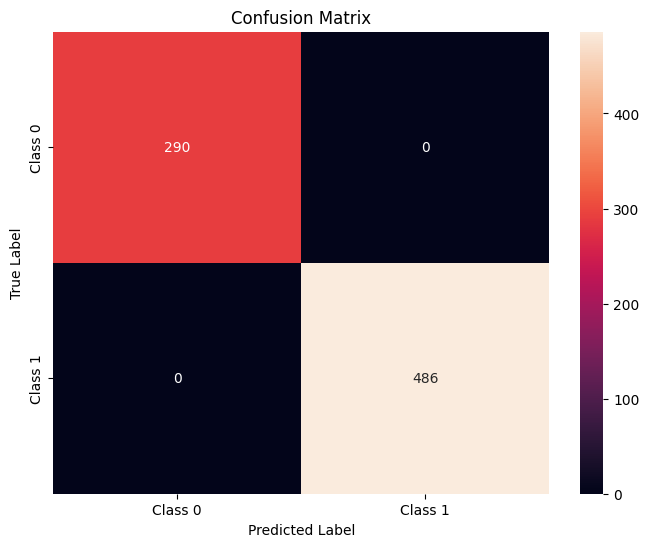

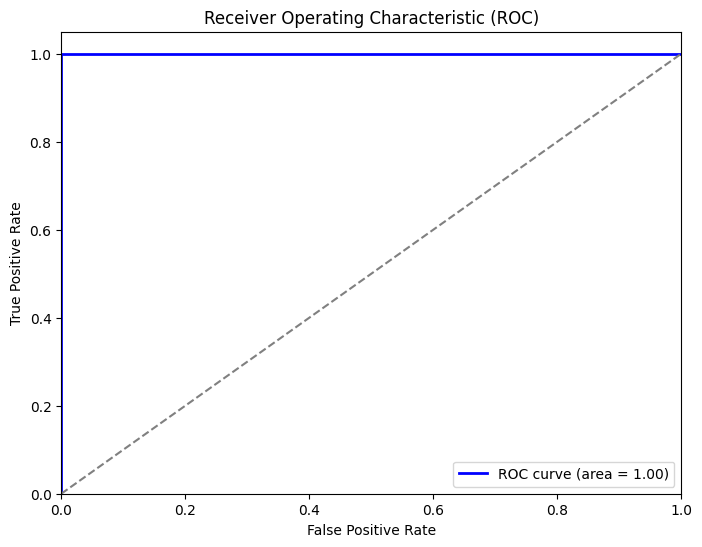


Best Threshold: 0.7030
Total Runtime: 0.19 seconds


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

X, y = load_data_audit_risk(split=False, normalize=False)

# Perform k-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store predictions and true labels
all_y_pred = []
all_y_true = []

# Lists to store predicted probabilities for ROC curve
all_y_probs = []
all_y_true_binary = []

start_time = time.time()

# Iterate through each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    X_train = apply_normalization(X_train)
    X_val = apply_normalization(X_val)

    # Initialize SVM classifier
    svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

    # Train the model
    svm_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred_fold = svm_classifier.predict(X_val)
    y_probs_fold = svm_classifier.predict_proba(X_val)[:, 1]

    # Collect predictions and true labels
    all_y_pred.extend(y_pred_fold)
    all_y_true.extend(y_val)
    all_y_probs.extend(y_probs_fold)
    all_y_true_binary.extend([1 if label == 1 else 0 for label in y_val])  # binary true labels (0 or 1)

    # Compute accuracy
    accuracy_fold = accuracy_score(y_val, y_pred_fold)
    print(f"Accuracy for fold: {accuracy_fold:.2f}")

end_time = time.time()

# Compute overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"Overall Accuracy from k-fold Cross-Validation: {overall_accuracy:.2f}", "\n")

# Compute confusion matrix
plot_confusion_matrix(all_y_true, all_y_pred)
print("\n")
# Plot ROC curve
plot_roc_curve(all_y_true_binary, all_y_probs)

# Find the best threshold
fpr, tpr, thresholds = roc_curve(all_y_true_binary, all_y_probs)
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]
print(f"\nBest Threshold: {best_threshold:.4f}")

runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} seconds")

# Part 4: Build a regressor based on the linear SVM

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# Load the dataset
X, y = load_data_bike_sharing(split=False, normalize=False)

# Perform k-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store predictions and true labels
all_y_pred = []
all_y_true = []

# Lists to store predicted probabilities for ROC curve
all_y_probs = []
all_y_true_binary = []

start_time = time.time()

# Iterate through each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    X_train = apply_normalization(X_train)
    X_val = apply_normalization(X_val)

    # Initialize SVM regressor
    svm_regressor = SVR(kernel='linear')

    # Train the model
    svm_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred_fold = svm_regressor.predict(X_val)

    # Collect predictions and true labels
    all_y_pred.extend(y_pred_fold)
    all_y_true.extend(y_val)

    # Compute mean squared error
    mse_fold = mean_squared_error(y_val, y_pred_fold)
    print(f"Mean Squared Error for fold: {mse_fold:.2f}")

end_time = time.time()

# Compute overall mean squared error
overall_mse = mean_squared_error(all_y_true, all_y_pred)
print(f"Overall Mean Squared Error from k-fold Cross-Validation: {overall_mse:.2f}")

# Compute R-squared score
r2 = r2_score(all_y_true, all_y_pred)
print(f"R-squared Score from k-fold Cross-Validation: {r2:.2f}")

runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} seconds")

Mean Squared Error for fold: 886382.25
Mean Squared Error for fold: 576749.69
Mean Squared Error for fold: 573099.16
Mean Squared Error for fold: 779019.99
Mean Squared Error for fold: 894812.06
Mean Squared Error for fold: 634093.34
Overall Mean Squared Error from k-fold Cross-Validation: 724149.11
R-squared Score from k-fold Cross-Validation: 0.81
Total Runtime: 0.19 seconds


# Part 5: Build a classifier based on the radial basis function SVM

Accuracy for fold: 0.76
Accuracy for fold: 0.72
Accuracy for fold: 0.76
Accuracy for fold: 0.77
Accuracy for fold: 0.72
Accuracy for fold: 0.74
Overall Accuracy from k-fold Cross-Validation: 0.74


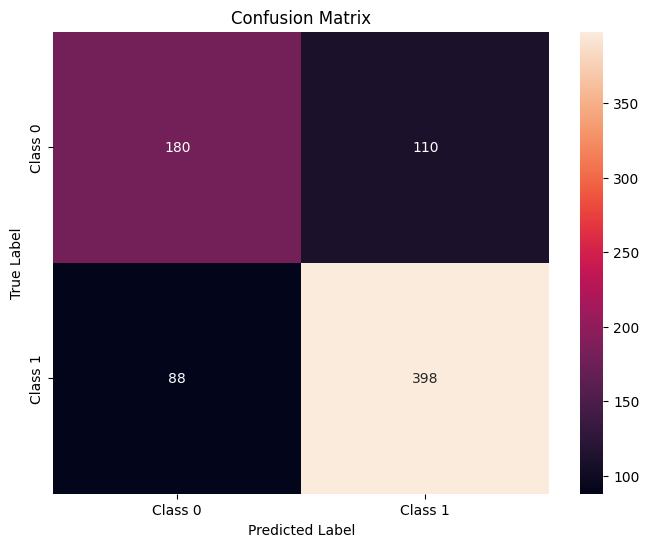

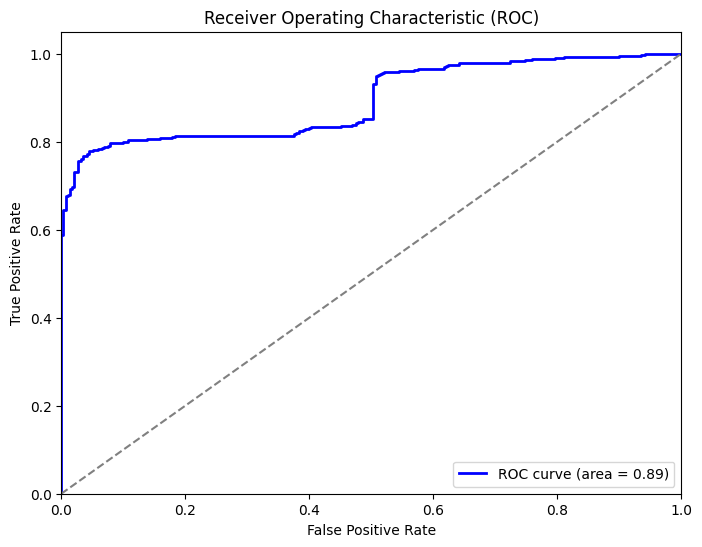


Best Threshold: 0.7126
Total Runtime: 0.48 seconds


In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the dataset
X, y = load_data_audit_risk(split=False, normalize=False)

# Perform k-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store predictions and true labels
all_y_pred = []
all_y_true = []

# Lists to store predicted probabilities for ROC curve
all_y_probs = []
all_y_true_binary = []

start_time = time.time()

# Iterate through each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize SVM classifier with RBF kernel
    svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

    # Train the model
    svm_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred_fold = svm_classifier.predict(X_val)
    y_probs_fold = svm_classifier.predict_proba(X_val)[:, 1]  # predicted probabilities for class 1

    # Collect predictions and true labels
    all_y_pred.extend(y_pred_fold)
    all_y_true.extend(y_val)
    all_y_probs.extend(y_probs_fold)
    all_y_true_binary.extend([1 if label == 1 else 0 for label in y_val])  # binary true labels (0 or 1)

    # Compute accuracy
    accuracy_fold = accuracy_score(y_val, y_pred_fold)
    print(f"Accuracy for fold: {accuracy_fold:.2f}")

end_time = time.time()

# Compute overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"Overall Accuracy from k-fold Cross-Validation: {overall_accuracy:.2f}")

# Compute confusion matrix
plot_confusion_matrix(all_y_true, all_y_pred)

print()

# Plot ROC curve
plot_roc_curve(all_y_true_binary, all_y_probs)

# Find the best threshold
fpr, tpr, thresholds = roc_curve(all_y_true_binary, all_y_probs)
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]
print(f"\nBest Threshold: {best_threshold:.4f}")

runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} seconds")

# Part 6: Build a classifier based on DT (Decision Trees)

Function to convert the decision tree into a set of rules

In [ ]:
from sklearn.tree import _tree

def extract_rules_from_tree(tree, feature_names):
    feature_name  = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree.feature]

    print(f"def tree({', '.join(feature_names)})")

    def recurse(node, depth):
        indent = "  " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[node]
            threshold = tree.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree.value[node]))

    recurse(0, 1)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define k-fold cross-validation
k_fold = KFold(n_splits=6, shuffle=True, random_state=42)

# Decision tree without pruning
tree_no_pruning = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation for the tree without pruning
no_pruning_scores = cross_val_score(tree_no_pruning, X, y, cv=k_fold)

print("Cross-validation scores without pruning:", no_pruning_scores)
print("Average accuracy without pruning:", no_pruning_scores.mean())

# Pre-pruning: Limiting the maximum depth of the tree
tree_pre_pruning = DecisionTreeClassifier(max_depth=3, random_state=42)

# Perform k-fold cross-validation for the tree with pre-pruning
pre_pruning_scores = cross_val_score(tree_pre_pruning, X, y, cv=k_fold)

print("\nCross-validation scores with pre-pruning:", pre_pruning_scores)
print("Average accuracy with pre-pruning:", pre_pruning_scores.mean())

# Post-pruning: Using cost complexity pruning
tree_post_pruning = DecisionTreeClassifier(random_state=42)
path = tree_post_pruning.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees with different ccp_alphas
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X, y)
    trees.append(tree)

# Find the tree with the highest accuracy on the test set
acc_scores = [cross_val_score(tree, X, y, cv=k_fold).mean() for tree in trees]
best_tree_idx = acc_scores.index(max(acc_scores))
tree_post_pruning = trees[best_tree_idx]

print("\nAverage cross-validation scores with post-pruning:", acc_scores)
print("Average accuracy with post-pruning:", acc_scores[best_tree_idx])

Cross-validation scores without pruning: [1. 1. 1. 1. 1. 1.]
Average accuracy without pruning: 1.0

Cross-validation scores with pre-pruning: [1. 1. 1. 1. 1. 1.]
Average accuracy with pre-pruning: 1.0

Average cross-validation scores with post-pruning: [1.0, 0.8622937785728483]
Average accuracy with post-pruning: 1.0


## Pruning Strategy 1: Pre-Pruning

Overal Accuracy from k-fold Cross-Validation: 1.0 



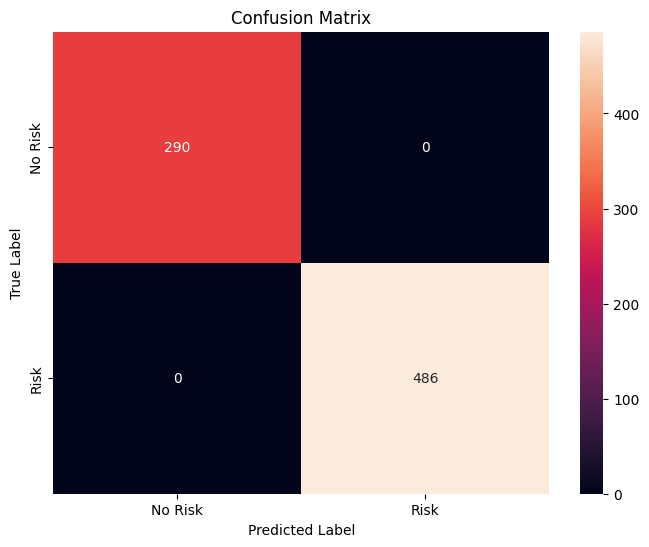


Total Runtime: 0.06 seconds


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
X, y = load_data_audit_risk(split=False, normalize=False)

dt_classifier_pre_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_pre_pruned.fit(X, y)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

start_time = time.time()

# Perform k-fold cross-validation
y_pred = cross_val_predict(dt_classifier_pre_pruned, X, y, cv=kf)

end_time = time.time()

accuracy = accuracy_score(y, y_pred)
print("Overal Accuracy from k-fold Cross-Validation:", accuracy, "\n")
plot_confusion_matrix(y, y_pred, ['No Risk', 'Risk'])

# Calculate and print runtime
runtime = end_time - start_time
print(f"\nTotal Runtime: {runtime:.2f} seconds")

In [ ]:
extract_rules_from_tree(dt_classifier_pre_pruned.tree_, X.columns)

def tree(Sector_score, LOCATION_ID, PARA_A, SCORE_A, PARA_B, SCORE_B, TOTAL, numbers, Marks, Money_Value, MONEY_Marks, District, Loss, LOSS_SCORE, History, History_score, Score)
  if Sector_score <= 2.100000023841858:
    return [[290.   0.]]
  else:  # if Sector_score > 2.100000023841858
    return [[  0. 486.]]


## Pruning Strategy 2: Post-Pruning

Overall Accuracy from k-fold Cross-Validation: 1.0 



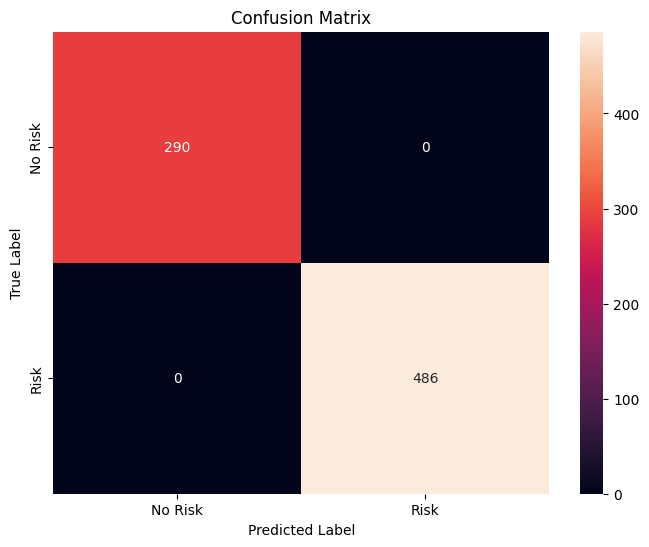


Total Runtime: 0.05 seconds


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
X, y = load_data_audit_risk(split=False, normalize=False)

# Define the DecisionTreeClassifier with post-pruning
dt_classifier_post_pruned = DecisionTreeClassifier(min_samples_split=10, ccp_alpha=0.01)
dt_classifier_post_pruned.fit(X, y)

# Perform k-fold cross-validation with post-pruned tree
kf = KFold(n_splits=6, shuffle=True, random_state=42)

start_time = time.time()

y_pred_pruned = cross_val_predict(dt_classifier_post_pruned, X, y, cv=kf)

end_time = time.time()

accuracy = accuracy_score(y, y_pred)
print("Overall Accuracy from k-fold Cross-Validation:", accuracy, "\n")
plot_confusion_matrix(y, y_pred, ['No Risk', 'Risk'])

# Calculate and print runtime
runtime = end_time - start_time
print(f"\nTotal Runtime: {runtime:.2f} seconds")

In [ ]:
extract_rules_from_tree(dt_classifier_post_pruned.tree_, X.columns)

def tree(Sector_score, LOCATION_ID, PARA_A, SCORE_A, PARA_B, SCORE_B, TOTAL, numbers, Marks, Money_Value, MONEY_Marks, District, Loss, LOSS_SCORE, History, History_score, Score)
  if Sector_score <= 2.100000023841858:
    return [[290.   0.]]
  else:  # if Sector_score > 2.100000023841858
    return [[  0. 486.]]


# Part 7: Build a regressor based on DT (Decision Trees)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
X, y = load_data_bike_sharing(split=False, normalize=False)

# Train Decision Tree Regressor with pre-pruning
dt_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=10)
dt_regressor.fit(X, y)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Perform k-fold cross-validation
end_time = time.time()

start_time = time.time()

mse_scores = cross_val_score(dt_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

end_time = time.time()

# Convert negative MSE scores to positive and calculate mean
mse_scores = -mse_scores
mean_mse = np.mean(mse_scores)

print(f"Mean Squared Error from k-fold Cross-Validation: {mean_mse:.2f}")

# Calculate and print runtime
runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} seconds")

Mean Squared Error from k-fold Cross-Validation: 354612.66
Total Runtime: 0.06 seconds


In [ ]:
extract_rules_from_tree(dt_regressor.tree_, X.columns)

def tree(season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered)
  if season <= 3905.5:
    if yr <= 2294.0:
      if mnth <= 1377.5:
        return [[1142.05263158]]
      else:  # if mnth > 1377.5
        return [[2155.50505051]]
    else:  # if yr > 2294.0
      if workingday <= 1626.0:
        return [[3881.68803419]]
      else:  # if workingday > 1626.0
        return [[5368.8]]
  else:  # if season > 3905.5
    if atemp <= 5283.5:
      if hum <= 1990.0:
        return [[5309.34965035]]
      else:  # if hum > 1990.0
        return [[7058.48648649]]
    else:  # if atemp > 5283.5
      if registered <= 5874.0:
        return [[6750.15217391]]
      else:  # if registered > 5874.0
        return [[7469.49333333]]


# Analysis and Discussion of Results

All the reported results are obtained through k-fold cross-validation, ensuring robust evaluation of the models' performance across different subsets of the dataset.

## Part 1: KNN Classifier (Euclidean Distance)
- **Overall Accuracy:** 0.99
- **Total Runtime:** 22.06 seconds

This model achieved an impressively high accuracy of 99% on average across all folds. However, the runtime is relatively high compared to some other models.

## Part 2: KNN Regressor (Manhattan Distance)
- **Average MSE:** 313543.76
- **Total Runtime:** 18.65 seconds

The mean squared error (MSE) for this model is quite high, indicating that it might not perform well in predicting the target values accurately. Additionally, the runtime is relatively high.

## Part 3: Linear SVM Classifier
- **Overall Accuracy:** 1.00
- **Best Threshold:** 0.7030
- **Total Runtime:** 0.19 seconds

This model achieved perfect accuracy (overfit), indicating that it performs very well on the classification task. The runtime is also relatively low, making it efficient.

## Part 4: Linear SVM Regressor
- **Overall Mean Squared Error:** 724149.11
- **R-squared Score:** 0.81
- **Total Runtime:** 0.19 seconds

While the mean squared error is high, the R-squared score indicates decent performance in explaining the variance of the target variable. The runtime is moderate.

## Part 5: Radial Basis Function SVM Classifier
- **Overall Accuracy:** 0.74
- **Best Threshold:** 0.7126
- **Total Runtime:** 0.48 seconds

The accuracy of this model is lower compared to the linear SVM classifier, but the runtime is still reasonable.

## Part 6: Decision Tree Classifier
### Pre-pruning
- **Overall Accuracy:** 1.0
- **Total Runtime:** 0.06 seconds

### Post-pruning
- **Overall Accuracy:** 1.0
- **Total Runtime:** 0.05 seconds

Both pre-pruning and post-pruning decision tree classifiers achieved perfect accuracy, indicating that they can capture the underlying patterns in the data effectively. However, it's important to note that decision trees are prone to overfitting, which may affect their performance on unseen data.

## Part 7: Decision Tree Regressor
- **Mean Squared Error:** 354612.66
- **Total Runtime:** 0.06 seconds

The mean squared error for this model is moderate, indicating reasonable performance in predicting the target variable. The runtime is very low, making it efficient.

## Discussion:
- For the classification problem, the best models are the Linear SVM Classifier and the Decision Tree Classifier (both pre-pruning and post-pruning), as they achieved highest accuracy with relatively low runtimes.
- For the regression problem, the Linear SVM Regressor and the Decision Tree Regressor performed reasonably well, with the Decision Tree Regressor having a slightly lower MSE and comparable runtime. However, it's important to note that decision trees are very likely to overfit, which may affect their performance on unseen data.